# Project - Air Passengers Prediction By Auto Regression (Time Series in Machine Learning)

#### Importing Basic libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
A=pd.read_csv('Air Passengers.csv')
A.head(20)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


### Changed index into time

In [3]:
A.index=pd.to_datetime(A.Month)

In [4]:
A=A.drop(labels=['Month'],axis=1)
A.head(20)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


### Visualizing Data of time series

<Axes: xlabel='Month'>

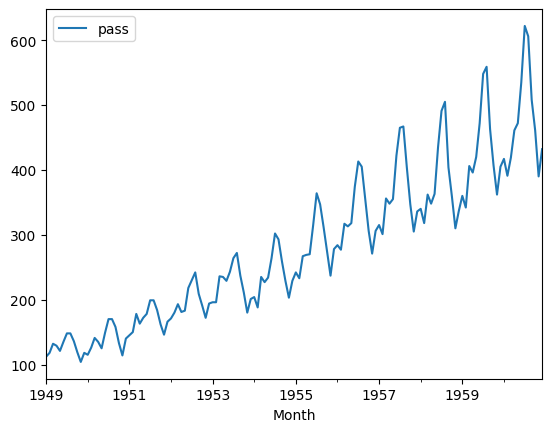

In [5]:
A.columns=['pass']
A.plot()

### Checking season,trend and residuals by decompose graph

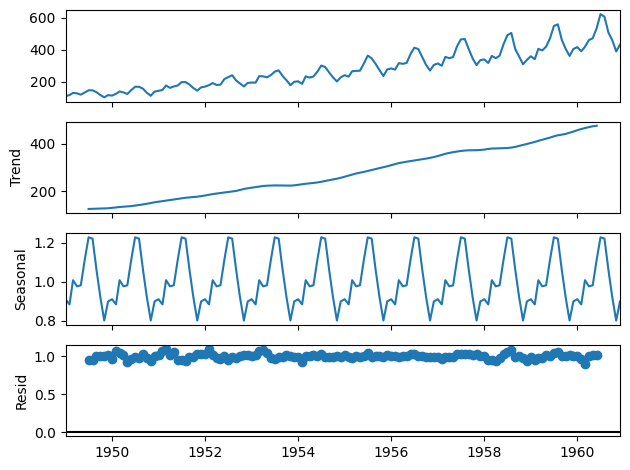

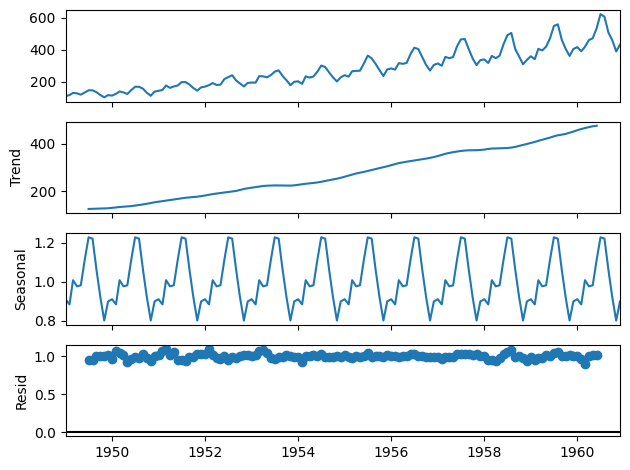

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
X1=seasonal_decompose(A,model='multiplicative')
X1.plot()

### Calculating and visualizing rolling mean 

<Figure size 7000x4000 with 0 Axes>

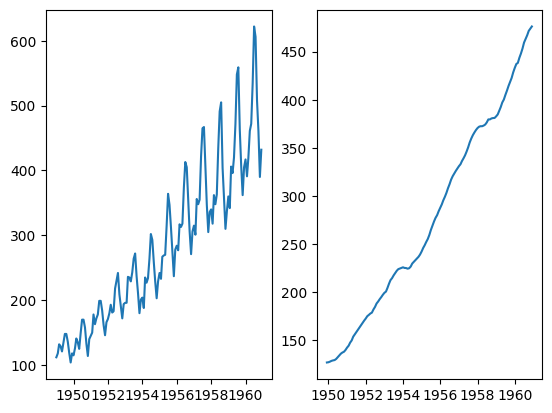

<Figure size 7000x4000 with 0 Axes>

In [7]:
RM_A=A.rolling(window=12).mean()
plt.subplot(1,2,1)
plt.plot(A)
plt.subplot(1,2,2)
plt.plot(RM_A)
plt.figure(figsize=(70,40))

### Calculations for constant mean and stationary data

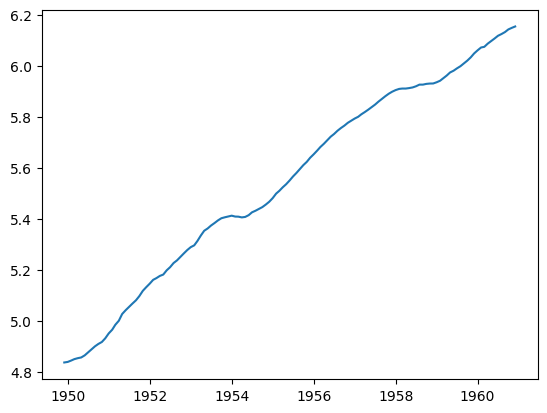

In [8]:
#same we can calculate std by std()
#now we have to change magnitute to smaller because we want constant mean or std
#first we use log
from numpy import log
LOG_A=log(A)
RM_LOG_A=LOG_A.rolling(window=12).mean()
plt.plot(RM_LOG_A)

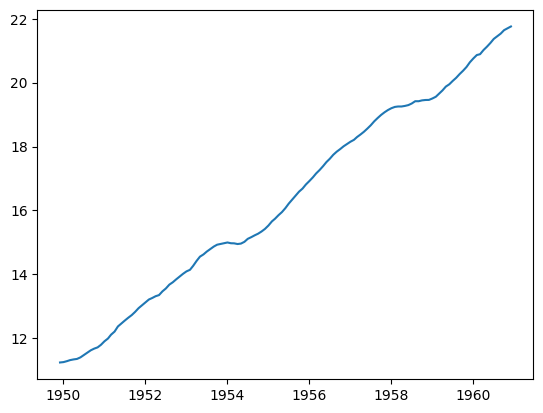

In [9]:
#we decreased the magnitute but we didnot get constant mean
#now we can use sqre root 3rd root,4th root......
from numpy import sqrt
SQ_A=sqrt(A)
RM_SQ_A=SQ_A.rolling(window=12).mean()
plt.plot(RM_SQ_A)

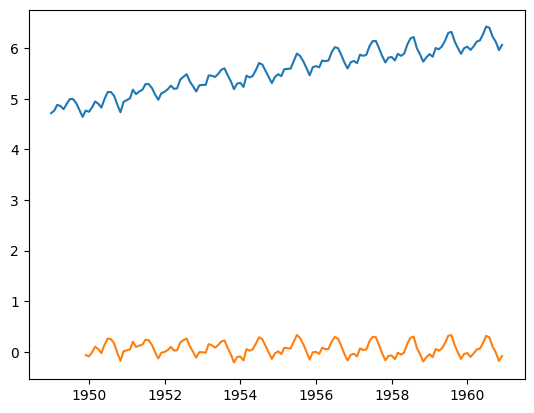

In [10]:
#still we didnot found Stationary time series
#now we can calculate diffrence between log and rolling mean og log
plt.plot(LOG_A)
plt.plot(LOG_A-RM_LOG_A)



In [11]:
#we found stationary time series
TS_NEW=LOG_A-RM_LOG_A
TS_NEW.head(20)

,pass
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


#### first we have to discart the null values

In [12]:
TS_NEW=TS_NEW[TS_NEW['pass'].isna()==False]
TS_NEW.shape

(133, 1)

In [13]:
#i have 133 columns so i have to change that into X and Y
trd=TS_NEW[0:106]
tsd=TS_NEW[106:134]
trd.head(20)

,pass
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [14]:
tsd.head(20)

,pass
Month,
1958-10-01,-0.045657
1958-11-01,-0.193762
1958-12-01,-0.110499
1959-01-01,-0.049241
1959-02-01,-0.106598
1959-03-01,0.055385
1959-04-01,0.019679
1959-05-01,0.066365
1959-06-01,0.176286


## Auto-Regression

In [15]:
#now we use auto regression model
from statsmodels.tsa.ar_model import AutoReg
model=AutoReg(trd,lags=13).fit()
pred=model.predict(start='1958-10-01',end='1960-12-01')

c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Visualizing output data

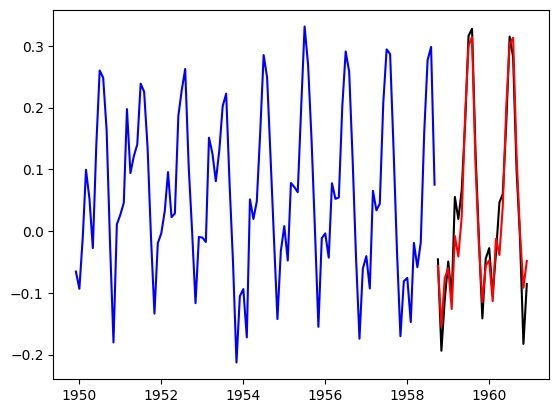

In [16]:
plt.plot(trd,c='blue')
plt.plot(tsd,c='black')
plt.plot(pred,c='red')

In [17]:
#now we want data in original format
from numpy import exp
exp(pred+RM_LOG_A.tail(27)['pass'])

1958-10-01    355.173827
1958-11-01    322.168289
1958-12-01    348.795451
1959-01-01    356.221007
1959-02-01    335.348812
1959-03-01    381.094304
1959-04-01    372.616932
1959-05-01    402.237842
1959-06-01    478.849364
1959-07-01    539.386251
1959-08-01    551.523748
1959-09-01    453.890718
1959-10-01    403.024626
1959-11-01    371.762491
1959-12-01    400.433566
1960-01-01    408.826928
1960-02-01    386.987926
1960-03-01    429.259404
1960-04-01    423.433952
1960-05-01    462.862345
1960-06-01    548.958721
1960-07-01    614.517897
1960-08-01    624.994249
1960-09-01    520.075327
1960-10-01    464.457206
1960-11-01    427.162373
1960-12-01    448.469719
Freq: MS, dtype: float64

In [18]:
#rolling mean also can be forecast